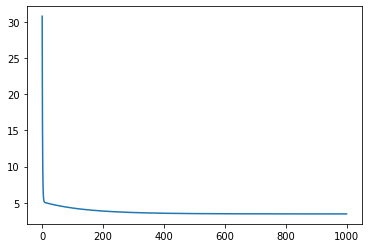

[-4.09641935  1.2020206 ]


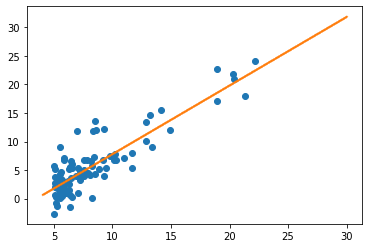

In [11]:
import numpy
import pandas
import matplotlib.pyplot as plt


def getData():
    data=numpy.array(pandas.read_csv('ex1data1.txt'))
    data=numpy.insert(data,0,numpy.ones((data.shape[0])),axis=1)
    theta=numpy.array([0,0])
    return data,theta

def compute(data,theta):
    return data[:,:2]@theta

def cost(data,theta):
    yo=compute(data,theta)
    errorValue=yo-data[:,2]
    return numpy.power(errorValue,2).sum()/(2*data.shape[0]),errorValue

def gradient(data,errorValue):
    decline=(errorValue.reshape(1,-1).T*data[:,0:2])
    return numpy.sum(decline,axis=0)/(data.shape[0])

def main():

    data,theta=getData()
    # j,errorValue=cost(data,theta)
    # print(gradient(data,errorValue))
    costs=[]
    for i in range(1000):
        j,errorValue=cost(data,theta)
        theta=theta-0.02*gradient(data,errorValue)
        costs.append(j)
    plt.plot(costs)
    plt.show()
    plt.scatter(data[:,1],data[:,2])
    print(theta)
    x=numpy.arange(4,30,0.01)
    y=x*theta[1]+theta[0]
    plt.scatter(x,y,s=0.1)

main()

# 单变量线性回归
即拟合一个形如y=ax+b的一个方程，拟合的参数就是a、b  
这里我们令a=theta1,b=theta0。  
用数学表达就是y=[1,x]@[theta0,theta1].T  
基于矩阵乘的优势，我们可以把批量的x带入方程中，求出y

## 方法
根据梯度下降的原理，我们初始化一个theta1,theta2（这里我设的是0，0）  
然后需要计算初始化的方程与期望的结果之间的差距，即为代价函数cost()。对于此处，我们可以定义代价函数为所有的计算结果与实际结果的平方，然后除以两倍的样本数量，公式如下  
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
得到代价函数后，我们可以知道，若想使直线尽可能的拟合散点集，就需要尽可能的减小代价函数，我们使用的方法就是梯度下降  
其原理就是对需要调整的theta值求偏导，偏导数反应了该theta值对整体的上升和下降的情况，若偏导大于0，说明此时对整体的误差有拉高作用，  
此时较底点在右边，需要减小一个量，因为偏导数约大，说明上升的趋势约明显，所以减小的量可以和偏导数的值成正比。偏导数小于0也是同理。
以此我们就可以构建出逐步逼近代价函数最小值得地方，下降公式如下  
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$